In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df=pd.read_csv("E:\insideAIML\ML\drug200.csv")

In [3]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [5]:
# separate iv and dv 

In [6]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [10]:
x=df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values

In [14]:
y=df['Drug'].values

In [16]:
x[:5 , :]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [18]:
set(x[:,1])

{'F', 'M'}

In [22]:
set(x[:,2])

{'HIGH', 'LOW', 'NORMAL'}

In [26]:
set(x[:,3])

{'HIGH', 'NORMAL'}

In [15]:
from sklearn.preprocessing import LabelEncoder

In [20]:
le_sex=LabelEncoder() 
le_sex.fit(['F', 'M'])
x[:,1]= le_sex.transform(x[:,1])

In [21]:
set(x[:,1])

{0, 1}

In [24]:
le_bp=LabelEncoder() 
le_bp.fit(['HIGH', 'LOW', 'NORMAL']) 
x[:,2]=le_bp.transform(x[:,2])

In [25]:
set(x[:,2])

{0, 1, 2}

In [28]:
le_chol=LabelEncoder() 
le_chol.fit(['HIGH', 'NORMAL']) 
x[:,3]=le_chol.transform(x[:,3])

In [29]:
set(x[:,3])

{0, 1}

In [30]:
x[:5 , :]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [31]:
from sklearn.preprocessing import LabelEncoder  

le_Drug=LabelEncoder() 
le_Drug.fit(['drugA', 'drugB', 'drugC', 'drugX', 'drugY'])
y=le_Drug.transform(y)

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train , x_test , y_train , y_test =train_test_split(x, y , random_state=50 , test_size=0.2)

In [34]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [38]:
xgb=XGBClassifier()
xgb.fit(x_train , y_train) 
y_pred_train=xgb.predict(x_train)
print(f" the traning accuracy is : {accuracy_score(y_train , y_pred_train)}")

y_pred_test=xgb.predict(x_test)
print(f" the testing accuracy is : {accuracy_score(y_test , y_pred_test)}")


 the traning accuracy is : 1.0
 the testing accuracy is : 0.975


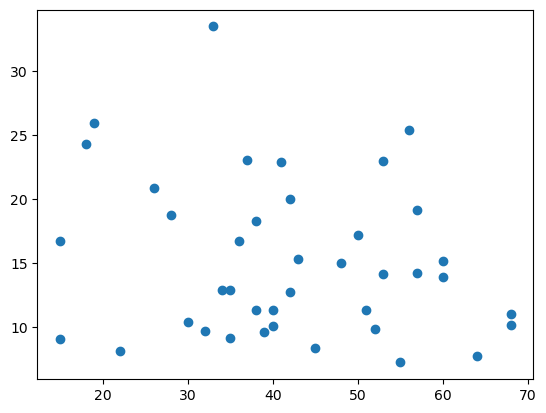

In [39]:
plt.scatter(x_test[ : , 0] , x_test[ : , 4])

In [40]:
colorset =np.array(["red" , "green" , "black" ,"pink", "blue" ])

In [ ]:
plt.scatter(x_test[ : , 0] , x_test[ : , 4] , c=colorset[y_test] )
plt.scatter(x_test[ : , 0] , x_test[ : , 4] , c=colorset[ y_pred_test] )

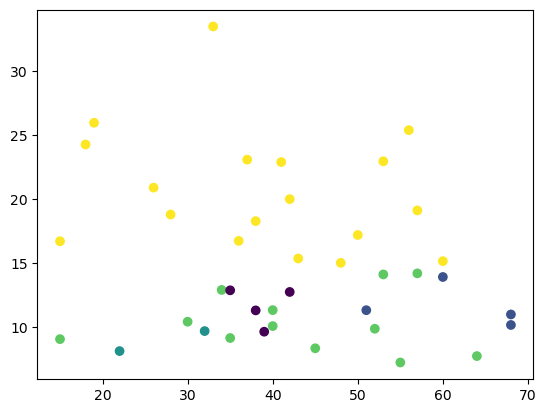

In [41]:
plt.scatter(x_test[ : , 0] , x_test[ : , 4] , c=y_test)

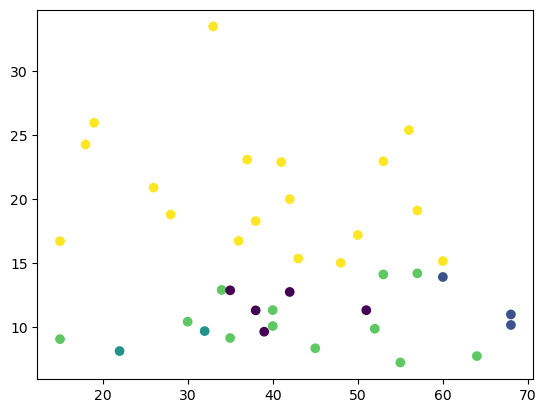

In [42]:
plt.scatter(x_test[ : , 0] , x_test[ : , 4] , c=y_pred_test)

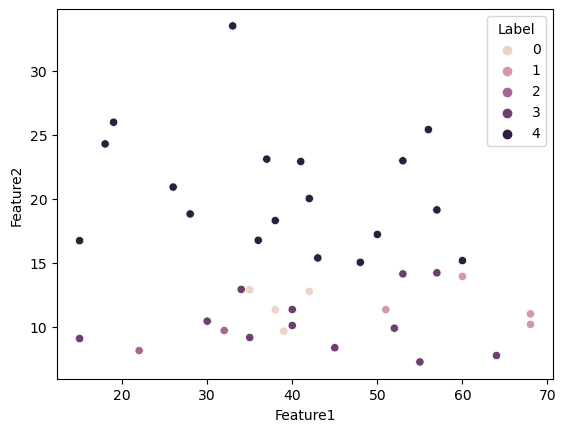

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
data = pd.DataFrame(data={'Feature1': x_test[:, 0], 'Feature2': x_test[:, 4], 'Label': y_test})

sns.scatterplot(x='Feature1', y='Feature2', hue='Label', data=data)

plt.show()


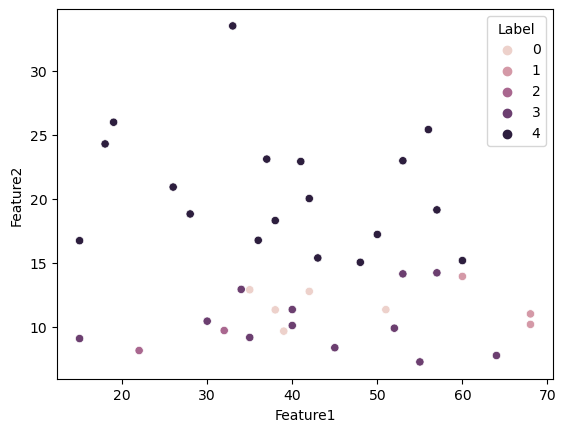

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
data = pd.DataFrame(data={'Feature1': x_test[:, 0], 'Feature2': x_test[:, 4], 'Label': y_pred_test})


sns.scatterplot(x='Feature1', y='Feature2', hue='Label', data=data)
plt.show()